# Centrality and Influence 
https://networkx.github.io/documentation/networkx-2.2/reference/algorithms/centrality.html


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import operator
import pandas as pd

### The Karate Club
the karate club network is available from networkx  and compare the radius and diameter of both networks
https://networkx.github.io/documentation/latest/reference/generated/networkx.generators.social.karate_club_graph.html?highlight=karate

http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm

/home/me/anaconda3/envs/geoenv7/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


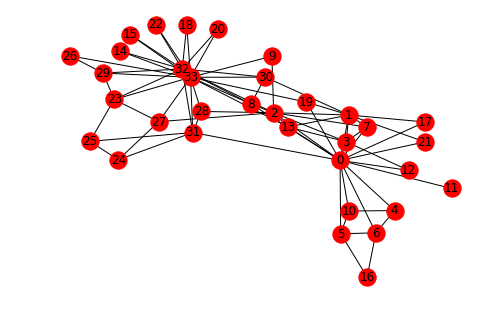

In [3]:
Gk = nx.karate_club_graph()
nx.draw(Gk, with_labels = True)

In [4]:
Gk.nodes(data = True)

NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}})

### lets look at the degree distribution of the network

#### `pd.Series()` creates a pandas geoseries
#### we are using the networks dictionary of degrees values to populate it

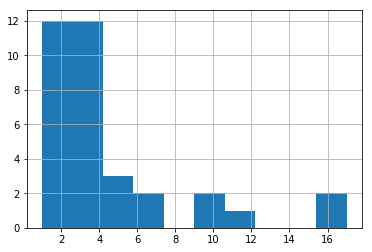

In [5]:
pd.Series(list(dict(Gk.degree()).values())).hist( )

##### sort the series to see the highest degrees

In [6]:
pd.Series(list(dict(Gk.degree()).values())).sort_values(ascending = False)

33    17
0     16
32    12
2     10
1      9
31     6
3      6
23     5
13     5
8      5
27     4
5      4
6      4
29     4
30     4
7      4
25     3
24     3
28     3
10     3
4      3
19     3
9      2
15     2
12     2
14     2
17     2
18     2
20     2
21     2
22     2
26     2
16     2
11     1
dtype: int64

##### plot the degrees on a regular and a loglog plot
what can we say about how the degrees in this network are distributed?

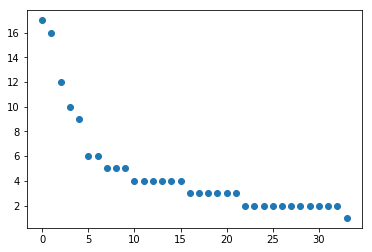

In [7]:
plt.plot(
    pd.Series(list(dict(Gk.degree()).values())).sort_values(ascending = False).tolist(), 
    marker='o',
    linestyle='none')
plt.show()

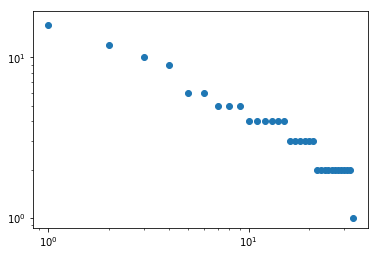

In [8]:
plt.loglog(
    pd.Series(list(dict(Gk.degree()).values())).sort_values(ascending = False).tolist(), 
    marker='o',
    linestyle='none')
plt.show()

## 1. degree centrality

use `nx.degree_centrality(G)` to get the list of degree centrality for all the nodes in the karate club

use `list(reversed(sorted(dict.items(), key=operator.itemgetter(1))))` to sort the list from the highest degree centrality to the lowest

which are the most central nodes (according to this measure) in this network and to what clubs do they belong?

##### plot the degree centrality distribution in this network - what can we say about this distribution?

## 2. Closeness Centrality

use `nx.closeness_centrality(G)` to get the list of degree centrality for all the nodes in the karate club

use `list(reversed(sorted(dict.items(), key=operator.itemgetter(1))))` to sort the list from the highest closeness centrality to the lowest

which nodes have the highest closeness centrality in this network and to what clubs do they belong?

plot the closeness centrality distribution in this network - what can we say about this distribution?

## 3. Betweenness Centrality

use `nx.betweenness_centrality(G)` to get the list of betweenness centrality for all the nodes in the karate club

which nodes have the highest betweenness centrality in this network and to what clubs do they belong?

plot the between centrality distribution in this network - what can we say about this distribution?

do the same - with end point inclusion: `nx.betweenness_centrality(G,endpoints = True)`

do the same - with  normalization and sampling : `nx.betweenness_centrality(G,endpoints = True, normalized = True,k = 7)` - can you notice any differences? - explain them

## Game of Thrones Centrality measures

Upload the file `stormofswords.csv` form the data folder
source: https://www.macalester.edu/~abeverid/thrones.html into a pandas DataFrame using `pd.read_csv(path)` <br/>
the file contains  a character network representation for "A Storm of Swords," the third book in the Game of Thrones series. Each character in the book as a vertex. A link is  added  between two characters whenever their names appeared within 15 words of one another. A link between characters means that they interacted, spoke of one another, or that another character spoke of them together. Characters that interacted frequently are connected multiple times.

In [9]:
got = pd.read_csv('../data/stormofswords.csv')

In [10]:
got.head()

,Source,Target,Weight
0,Aemon,Grenn,5
1,Aemon,Samwell,31
2,Aerys,Jaime,18
3,Aerys,Robert,6
4,Aerys,Tyrion,5


Create a network from the table using `G.add_weighted_edges_from()`

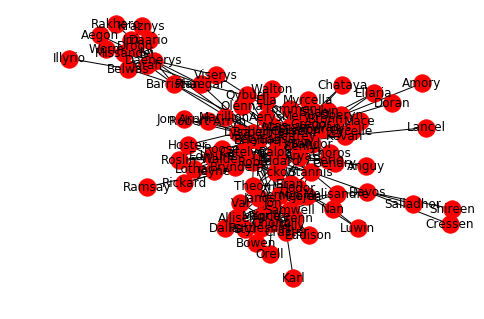

In [11]:
G = nx.Graph()
G.add_weighted_edges_from(zip(got['Source'], got['Target'], got['Weight']))
nx.draw(G, with_labels = True)

plot the degree distribution and calculate the different centrality measures for this network
who are the most influential characters in this network according to the different measure and how can we interpret them?


## Connectivity and robustness

inspect whether the network is connected using `nx.is_connected(G)`

##### number of nodes needed to break the network

use `nx.node_connectivity(G)` to get the minimum number of nodes needed to break the got network

##### Get the nodes needed to cut the network

use `nx.minimum_node_cut(G)` to get the the nodes needed to break the got network - which are these nodes?

##### number of edges needed to break the network

use `nx.edge_connectivity(G)` to get the minimum number of edges needed to break the got network - which one is more robust?

##### Get the edges needed to cut the network

use `nx.minimum_edge_cut(G)` to get the the edges needed to break got network - which are these edges?

##### break the network

remove the nodes needed to break the network using `G.remove_node(node)`

##### number of connected components in a network

get the number of connected components  using `nx.number_connected_components(G1)`

##### Get all connected components

get the connected components  using `list(nx.connected_components(G1))`

recreate the network from the original data frame and break it, removing  edges (use `G.remove_edges_from()`) )

In [ ]:
G = nx.Graph()
G.add_weighted_edges_from(zip(got['Source'], got['Target'], got['Weight']))

##### number of connected components in a network

get the number of connected components  using `nx.number_connected_components(G1)`

##### Get all connected components

get the connected components  using `list(nx.connected_components(G1))`